In [1]:
#################################
#                               #
#         Deep Learning         #
#       Transfer Learning       #
#    Classification d'images    #
#                               #
#################################

In [6]:
# Librairies à importer

import numpy as np
import pandas as pd

import os
import glob
import shutil
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

ModuleNotFoundError: No module named 'tensorflow'

# Data

In [3]:
# Importation des données "fashion_mnist"

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print("x_train.shape : ",x_train.shape)
print("x_test.shape : ",x_test.shape)
print("y_train.shape : ",y_train.shape)
print("y_test.shape : ",y_test.shape)

x_train.shape :  (60000, 28, 28)
x_test.shape :  (10000, 28, 28)
y_train.shape :  (60000,)
y_test.shape :  (10000,)


In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [6]:
y_train[0]

9

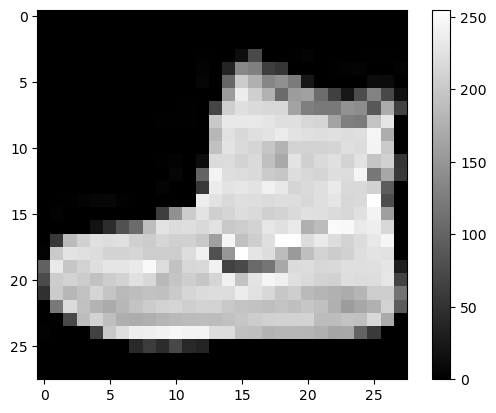

In [7]:
plt.figure()
plt.imshow(x_train[0].reshape([28, 28]), cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

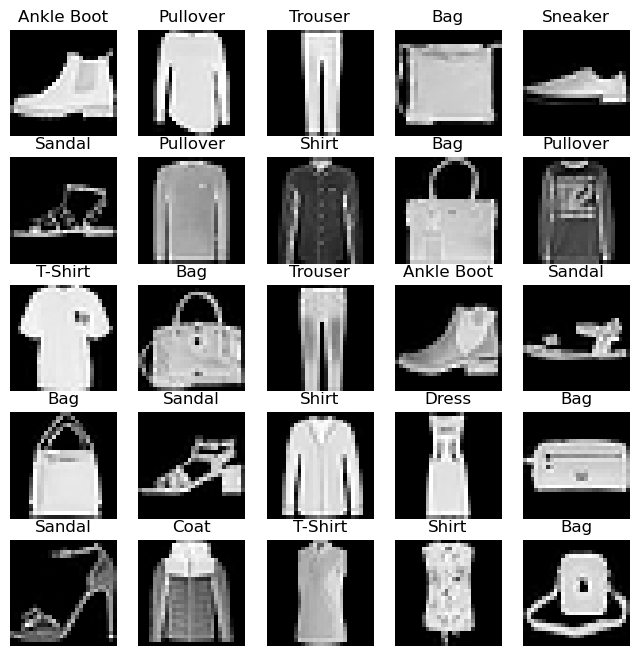

In [8]:
plt.rcParams['figure.figsize'] = (10, 14)
plt.rc('font', size=10)
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))
for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(x_train))
    img = x_train[data_idx].reshape([28, 28])
    lab = labels_map[y_train[data_idx]]
    plt.subplot(rows, columns, i)
    plt.title(lab)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [9]:
# Normalisation

x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print("x_train.shape : ",x_train.shape)
print("x_test.shape : ",x_test.shape)
print("y_train.shape : ",y_train.shape)
print("y_test.shape : ",y_test.shape)

x_train.shape :  (60000, 784)
x_test.shape :  (10000, 784)
y_train.shape :  (60000, 10)
y_test.shape :  (10000, 10)


# PMC n°1

In [11]:
model = Sequential()
model.add(Dense(10, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Metal device set to: Apple M1 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


2022-09-29 16:38:54.915642: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-29 16:38:54.915743: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.1)

Epoch 1/10


2022-09-29 16:38:55.055774: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   1/1688 [..............................] - ETA: 5:21 - loss: 2.3043 - accuracy: 0.1875

2022-09-29 16:38:55.177035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1685/1688 [============================>.] - ETA: 0s - loss: 0.7230 - accuracy: 0.7569

2022-09-29 16:39:05.941470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 12s 7ms/step - loss: 0.7225 - accuracy: 0.7570 - val_loss: 0.5161 - val_accuracy: 0.8220
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4763 - accuracy: 0.8349 - val_loss: 0.4476 - val_accuracy: 0.8507
Epoch 3/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4490 - accuracy: 0.8435 - val_loss: 0.4390 - val_accuracy: 0.8433
Epoch 4/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4326 - accuracy: 0.8493 - val_loss: 0.4345 - val_accuracy: 0.8508
Epoch 5/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4231 - accuracy: 0.8520 - val_loss: 0.4301 - val_accuracy: 0.8498
Epoch 6/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4132 - accuracy: 0.8565 - val_loss: 0.4217 - val_accuracy: 0.8478
Epoch 7/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4089 - accuracy: 0.8585 - val_loss: 0.4109 - val_accuracy: 0.8

In [14]:
_, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.4328 - accuracy: 0.8493
0.8493000268936157


In [15]:
prediction = model.predict(x_train)

 106/1875 [>.............................] - ETA: 2s

2022-09-29 16:40:52.944148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 3s 1ms/step


In [16]:
prediction

array([[2.42522257e-13, 5.18823214e-11, 1.24896482e-10, ...,
        7.34261237e-04, 6.96088705e-07, 9.99260008e-01],
       [9.92844403e-01, 3.18245075e-09, 1.51811095e-04, ...,
        1.02357227e-22, 2.63044894e-05, 3.92441098e-13],
       [3.63855660e-01, 6.12893365e-02, 7.92658851e-02, ...,
        4.33816272e-09, 4.01775120e-03, 3.60452965e-08],
       ...,
       [7.99504865e-04, 9.64507199e-05, 9.79545643e-04, ...,
        2.96468138e-15, 2.75386151e-06, 1.52660911e-13],
       [7.10602760e-01, 2.83663557e-03, 1.34726405e-01, ...,
        3.80154908e-10, 1.73945501e-02, 2.36726407e-08],
       [1.83510547e-05, 2.31023137e-07, 3.52632051e-05, ...,
        9.53762094e-04, 1.41455920e-03, 8.55872931e-05]], dtype=float32)

In [17]:
print(y_train[0])
print(prediction[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[2.4252226e-13 5.1882321e-11 1.2489648e-10 9.3887864e-10 1.4342863e-10
 4.9442974e-06 2.8028329e-09 7.3426124e-04 6.9608870e-07 9.9926001e-01]


# PMC n°2

In [18]:
model2 = Sequential()
model2.add(Dense(50, input_dim=784, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                39250     
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [20]:
model2.fit(x_train, y_train,
           epochs=10,
           validation_split=0.1)

Epoch 1/10
  17/1688 [..............................] - ETA: 11s - loss: 1.9289 - accuracy: 0.3640

2022-09-29 16:40:56.091545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - ETA: 0s - loss: 0.5492 - accuracy: 0.8134

2022-09-29 16:41:06.964110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 12s 7ms/step - loss: 0.5492 - accuracy: 0.8134 - val_loss: 0.4567 - val_accuracy: 0.8380
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4107 - accuracy: 0.8573 - val_loss: 0.3876 - val_accuracy: 0.8622
Epoch 3/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3702 - accuracy: 0.8683 - val_loss: 0.3993 - val_accuracy: 0.8513
Epoch 4/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3459 - accuracy: 0.8757 - val_loss: 0.3607 - val_accuracy: 0.8745
Epoch 5/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3253 - accuracy: 0.8821 - val_loss: 0.3556 - val_accuracy: 0.8723
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3111 - accuracy: 0.8856 - val_loss: 0.3464 - val_accuracy: 0.8762
Epoch 7/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2991 - accuracy: 0.8899 - val_loss: 0.3398 - val_accuracy: 0.8

In [21]:
_, test_acc = model2.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3550 - accuracy: 0.8746
0.8746000528335571


# PMC n°3

In [22]:
model3 = Sequential()
model3.add(Dense(50, input_dim=784, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [23]:
model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [24]:
model3.fit(x_train, y_train,
           epochs=10,
           validation_split=0.1)

Epoch 1/10
  17/1688 [..............................] - ETA: 11s - loss: 2.1268 - accuracy: 0.2757

2022-09-29 16:42:58.088118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1683/1688 [============================>.] - ETA: 0s - loss: 0.5428 - accuracy: 0.8068

2022-09-29 16:43:09.623100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 13s 7ms/step - loss: 0.5424 - accuracy: 0.8068 - val_loss: 0.4153 - val_accuracy: 0.8497
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3911 - accuracy: 0.8580 - val_loss: 0.3858 - val_accuracy: 0.8535
Epoch 3/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3525 - accuracy: 0.8714 - val_loss: 0.4094 - val_accuracy: 0.8563
Epoch 4/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3314 - accuracy: 0.8770 - val_loss: 0.3589 - val_accuracy: 0.8758
Epoch 5/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3128 - accuracy: 0.8842 - val_loss: 0.3473 - val_accuracy: 0.8763
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3000 - accuracy: 0.8899 - val_loss: 0.3486 - val_accuracy: 0.8750
Epoch 7/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.2879 - accuracy: 0.8934 - val_loss: 0.3274 - val_accuracy: 0.8

In [25]:
_, test_acc = model3.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3457 - accuracy: 0.8800
0.8800000548362732


# PMC n°4

In [26]:
model4 = Sequential()
model4.add(Dense(50, input_dim=784, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(50, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [27]:
model4.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [28]:
model4.fit(x_train, y_train,
           epochs=10,
           validation_split=0.1)

Epoch 1/10


2022-09-29 16:45:04.470027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1687/1688 [============================>.] - ETA: 0s - loss: 0.8305 - accuracy: 0.7022

2022-09-29 16:45:17.129203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 14s 8ms/step - loss: 0.8304 - accuracy: 0.7022 - val_loss: 0.5037 - val_accuracy: 0.8243
Epoch 2/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.5535 - accuracy: 0.8069 - val_loss: 0.4747 - val_accuracy: 0.8292
Epoch 3/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.5025 - accuracy: 0.8218 - val_loss: 0.4477 - val_accuracy: 0.8378
Epoch 4/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.4734 - accuracy: 0.8310 - val_loss: 0.4387 - val_accuracy: 0.8457
Epoch 5/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.4554 - accuracy: 0.8375 - val_loss: 0.4076 - val_accuracy: 0.8522
Epoch 6/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.4468 - accuracy: 0.8406 - val_loss: 0.4158 - val_accuracy: 0.8507
Epoch 7/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.4326 - accuracy: 0.8439 - val_loss: 0.3981 - val_accuracy: 0.8

In [29]:
_, test_acc = model4.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.4233 - accuracy: 0.8532
0.8532000184059143


# Réseau de neurones convolutif

In [30]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [31]:
x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
print("x_train.shape : ",x_train.shape)
print("x_test.shape : ",x_test.shape)
print("y_train.shape : ",y_train.shape)
print("y_test.shape : ",y_test.shape)

x_train.shape :  (60000, 28, 28, 1)
x_test.shape :  (10000, 28, 28, 1)
y_train.shape :  (60000, 10)
y_test.shape :  (10000, 10)


In [33]:
model4 = Sequential()
model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
model4.add(MaxPooling2D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(10, activation='softmax'))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense_10 (Dense)            (None, 10)                125450    
                                                                 
Total params: 125,770
Trainable params: 125,770
Non-trainable params: 0
_________________________________________________________________


In [34]:
model4.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [35]:
model4.fit(x_train, y_train,
           epochs=10,
           validation_split=0.1)

Epoch 1/10
  10/1688 [..............................] - ETA: 19s - loss: 1.8205 - accuracy: 0.4125

2022-09-29 16:47:20.228703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - ETA: 0s - loss: 0.4526 - accuracy: 0.8422

2022-09-29 16:47:37.542841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 18s 11ms/step - loss: 0.4526 - accuracy: 0.8422 - val_loss: 0.3583 - val_accuracy: 0.8728
Epoch 2/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.3247 - accuracy: 0.8866 - val_loss: 0.3183 - val_accuracy: 0.8873
Epoch 3/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.2903 - accuracy: 0.8973 - val_loss: 0.3219 - val_accuracy: 0.8823
Epoch 4/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.2681 - accuracy: 0.9043 - val_loss: 0.2893 - val_accuracy: 0.8947
Epoch 5/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.2501 - accuracy: 0.9124 - val_loss: 0.2765 - val_accuracy: 0.9017
Epoch 6/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.2362 - accuracy: 0.9160 - val_loss: 0.2718 - val_accuracy: 0.9037
Epoch 7/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.2228 - accuracy: 0.9197 - val_loss: 0.2732 - val_accura

In [36]:
_, test_acc = model4.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.2921 - accuracy: 0.8996
0.8996000289916992


# Transfer Learning

In [37]:
# Librairies à importer

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [38]:
#########
#
# A FAIRE AVANT LA SUITE : dézipper le fichier 'images.zip' dans le dossier 'data/images/'
#
#########

In [39]:
files = glob.glob('images/images/*')

cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]
print(len(cat_files), len(dog_files))

12500 12500


In [40]:
# build smaller dataset: 3,000 images for training, 1,000 images
# for validation, and 1,000 images for test dataset

cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))

cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (500,) (500,)
Dog datasets: (1500,) (500,) (500,)


In [41]:
# Save images in separte folders

train_dir = 'images/training_data'
val_dir = 'images/validation_data'
test_dir = 'images/test_data'

train_files = np.concatenate([cat_train, dog_train])
validation_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in train_files:
    shutil.copy(fn, train_dir)
for fn in validation_files:
    shutil.copy(fn, val_dir)
for fn in test_files:
    shutil.copy(fn, test_dir)

In [42]:
# Load datasets

IMG_DIM = (150, 150)

#train_files = glob.glob('data/training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[2].split('.')[0].strip() for fn in train_files]

#validation_files = glob.glob('data/validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[2].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape,)
print('Validation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3)
Validation dataset shape: (1000, 150, 150, 3)


In [43]:
# Scale each image with pixel values between (0, 255)
# to values between (0, 1) 

train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')

train_imgs_scaled /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


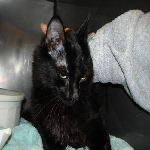

In [44]:
# visualize a sample image
   
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [45]:
# Encode text category labels

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)

train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:10], train_labels_enc[0:10])

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat'] [0 0 0 0 0 0 0 0 0 0]


##### Building CNN models from scratch

In [46]:
model5 = Sequential()

# Convolution and pooling layers

input_shape = (150, 150, 3)
model5.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())
model5.add(Dense(512, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 64)        9280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 128)     

In [47]:
# Train the model

batch_size = 30
num_classes = 2
epochs = 30

history = model5.fit(x=train_imgs_scaled, y=train_labels_enc, 
                    validation_data=(validation_imgs_scaled,
                    validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/30


2022-09-29 16:50:29.813612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 99/100 [============================>.] - ETA: 0s - loss: 0.8288 - accuracy: 0.5764

2022-09-29 16:50:32.986611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 4s 33ms/step - loss: 0.8263 - accuracy: 0.5780 - val_loss: 0.6113 - val_accuracy: 0.6830
Epoch 2/30
100/100 [==============================] - 3s 28ms/step - loss: 0.6025 - accuracy: 0.6880 - val_loss: 0.5896 - val_accuracy: 0.7240
Epoch 3/30
100/100 [==============================] - 3s 29ms/step - loss: 0.5510 - accuracy: 0.7237 - val_loss: 0.6096 - val_accuracy: 0.7060
Epoch 4/30
100/100 [==============================] - 3s 29ms/step - loss: 0.4838 - accuracy: 0.7687 - val_loss: 0.5891 - val_accuracy: 0.6970
Epoch 5/30
100/100 [==============================] - 3s 29ms/step - loss: 0.4130 - accuracy: 0.8110 - val_loss: 0.5208 - val_accuracy: 0.7460
Epoch 6/30
100/100 [==============================] - 3s 28ms/step - loss: 0.3515 - accuracy: 0.8490 - val_loss: 0.5668 - val_accuracy: 0.7350
Epoch 7/30
100/100 [==============================] - 3s 28ms/step - loss: 0.2497 - accuracy: 0.8987 - val_loss: 0.7867 - val_accuracy: 0.7180
Epoch 8/30

In [48]:
model5.save('images/cats_dogs_basic_cnn.h5')

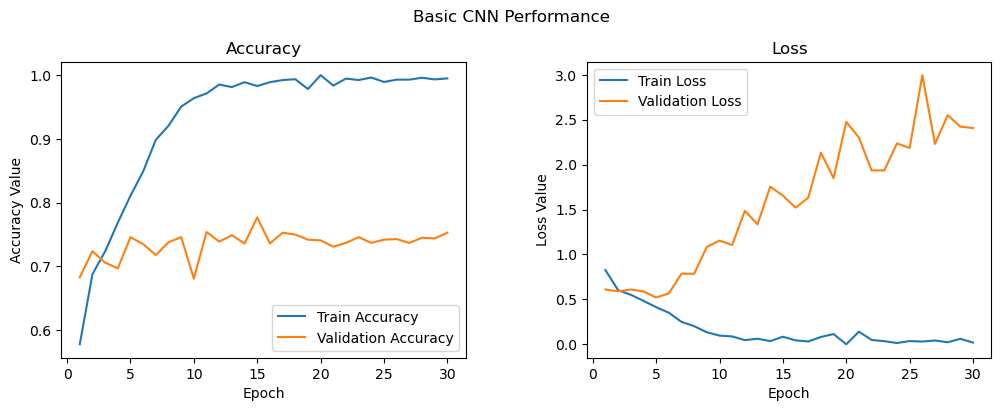

In [49]:
# Display accuracy values

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))

ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

##### Building CNN models with regularization

In [50]:
modelR = Sequential()

input_shape = (150, 150, 3)
modelR.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
modelR.add(MaxPooling2D(pool_size=(2, 2)))
modelR.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
modelR.add(MaxPooling2D(pool_size=(2, 2)))
modelR.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelR.add(MaxPooling2D(pool_size=(2, 2)))
modelR.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelR.add(MaxPooling2D(pool_size=(2, 2)))
modelR.add(Flatten())
modelR.add(Dense(512, activation='relu'))
modelR.add(Dropout(0.3))
modelR.add(Dense(512, activation='relu'))
modelR.add(Dropout(0.3))
modelR.add(Dense(1, activation='sigmoid'))

modelR.compile(loss='binary_crossentropy',
                 optimizer=optimizers.RMSprop(),
                 metrics=['accuracy'])
modelR.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        9280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [51]:
# Train the model

historyR = modelR.fit(x=train_imgs_scaled, y=train_labels_enc, 
                    validation_data=(validation_imgs_scaled,
                    validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/30


2022-09-29 16:51:57.361207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 98/100 [============================>.] - ETA: 0s - loss: 0.7330 - accuracy: 0.5167

2022-09-29 16:52:00.162826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 3s 26ms/step - loss: 0.7319 - accuracy: 0.5167 - val_loss: 0.6820 - val_accuracy: 0.5250
Epoch 2/30
100/100 [==============================] - 2s 21ms/step - loss: 0.6887 - accuracy: 0.5643 - val_loss: 0.6745 - val_accuracy: 0.5500
Epoch 3/30
100/100 [==============================] - 2s 21ms/step - loss: 0.6852 - accuracy: 0.6010 - val_loss: 0.6543 - val_accuracy: 0.6040
Epoch 4/30
100/100 [==============================] - 2s 23ms/step - loss: 0.6442 - accuracy: 0.6517 - val_loss: 0.6363 - val_accuracy: 0.6060
Epoch 5/30
100/100 [==============================] - 2s 22ms/step - loss: 0.5673 - accuracy: 0.7160 - val_loss: 0.6218 - val_accuracy: 0.6830
Epoch 6/30
100/100 [==============================] - 2s 22ms/step - loss: 0.5106 - accuracy: 0.7617 - val_loss: 0.5201 - val_accuracy: 0.7350
Epoch 7/30
100/100 [==============================] - 2s 22ms/step - loss: 0.4651 - accuracy: 0.7803 - val_loss: 0.5206 - val_accuracy: 0.7690
Epoch 8/30

In [52]:
modelR.save('cats_dogs_regul_cnn.h5')

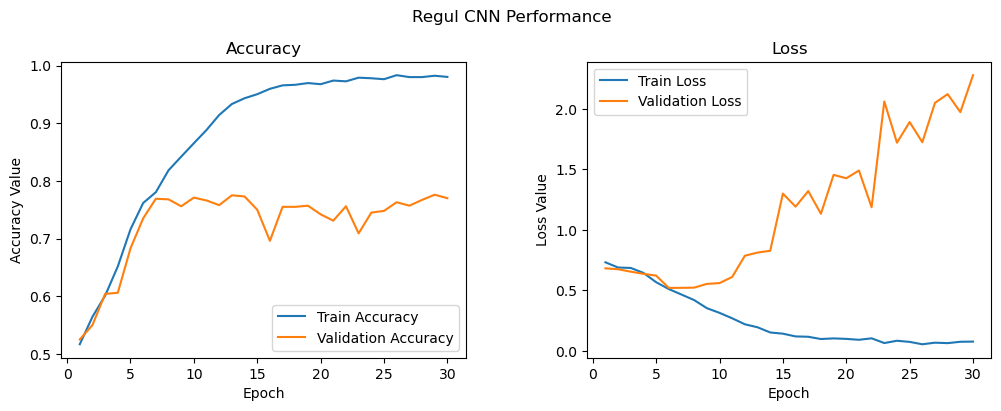

In [53]:
# Display accuracy values

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Regul CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))

ax1.plot(epoch_list, historyR.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, historyR.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, historyR.history['loss'], label='Train Loss')
ax2.plot(epoch_list, historyR.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

##### Building CNN model with image augmentation

In [54]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,
                                      rotation_range=50,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


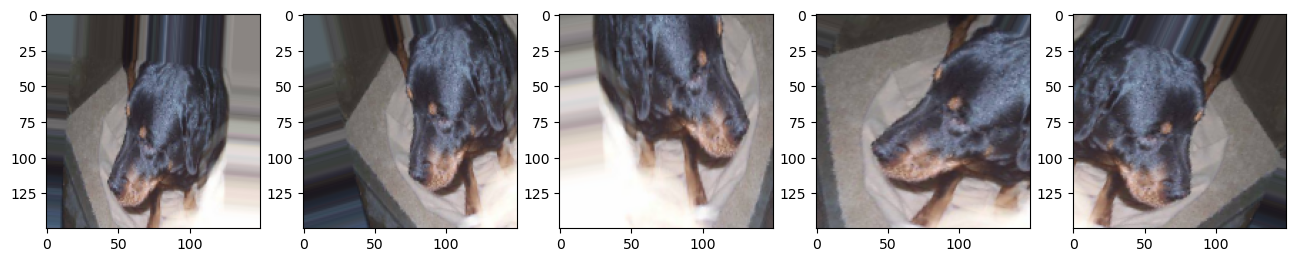

In [55]:
# Display an example of cat image

img_id = 2595
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1],
                                      train_labels[img_id:img_id+1],
                                      batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

In [56]:
# We just apply image augmentation transformations only
# on the training images

train_generator = train_datagen.flow(train_imgs, train_labels_enc,
                                        batch_size=30)
val_generator = val_datagen.flow(validation_imgs,
                                    validation_labels_enc,
                                    batch_size=20)

In [57]:
# Train a the model

modelRIA = Sequential()

input_shape = (150, 150, 3)
modelRIA.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
modelRIA.add(MaxPooling2D(pool_size=(2, 2)))
modelRIA.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
modelRIA.add(MaxPooling2D(pool_size=(2, 2)))
modelRIA.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelRIA.add(MaxPooling2D(pool_size=(2, 2)))
modelRIA.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelRIA.add(MaxPooling2D(pool_size=(2, 2)))
modelRIA.add(Flatten())
modelRIA.add(Dense(512, activation='relu'))
modelRIA.add(Dropout(0.3))
modelRIA.add(Dense(512, activation='relu'))
modelRIA.add(Dropout(0.3))
modelRIA.add(Dense(1, activation='sigmoid'))


modelRIA.compile(loss='binary_crossentropy',
                 optimizer=optimizers.RMSprop(lr=1e-4),
                 metrics=['accuracy'])

modelRIA.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        9280      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

/Users/stephanebonnevay/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [58]:
# Train the model

historyRIA = modelRIA.fit_generator(train_generator,
                                 steps_per_epoch=100, epochs=100,
                                 validation_data=val_generator,
                                 validation_steps=50, verbose=1)

Epoch 1/100


/var/folders/r7/09kq76453l39v8hylnmfxtjc0000gn/T/ipykernel_5554/1349746149.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  historyRIA = modelRIA.fit_generator(train_generator,
2022-09-29 16:53:05.109518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.5037

2022-09-29 16:53:12.631218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 8s 78ms/step - loss: 0.6948 - accuracy: 0.5037 - val_loss: 0.6889 - val_accuracy: 0.5860
Epoch 2/100
100/100 [==============================] - 7s 73ms/step - loss: 0.6855 - accuracy: 0.5577 - val_loss: 0.6712 - val_accuracy: 0.5910
Epoch 3/100
100/100 [==============================] - 7s 73ms/step - loss: 0.6755 - accuracy: 0.5723 - val_loss: 0.6523 - val_accuracy: 0.6170
Epoch 4/100
100/100 [==============================] - 7s 73ms/step - loss: 0.6647 - accuracy: 0.5993 - val_loss: 0.6295 - val_accuracy: 0.6630
Epoch 5/100
100/100 [==============================] - 7s 73ms/step - loss: 0.6475 - accuracy: 0.6270 - val_loss: 0.6614 - val_accuracy: 0.5820
Epoch 6/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6395 - accuracy: 0.6300 - val_loss: 0.5933 - val_accuracy: 0.6920
Epoch 7/100
100/100 [==============================] - 8s 75ms/step - loss: 0.6306 - accuracy: 0.6473 - val_loss: 0.5943 - val_accuracy: 0.6770
Epoc

In [59]:
modelRIA.save('images/cats_dogs_regulimgaug_cnn.h5')

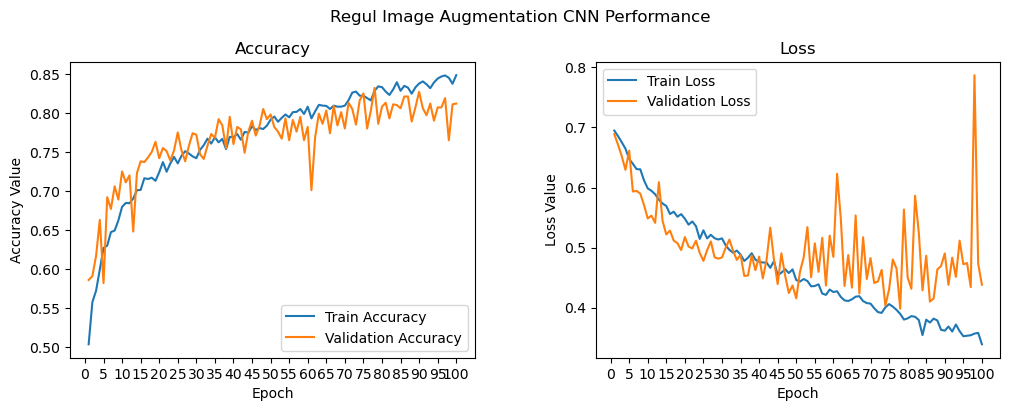

In [60]:
# Display accuracy values

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Regul Image Augmentation CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))

ax1.plot(epoch_list, historyRIA.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, historyRIA.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, historyRIA.history['loss'], label='Train Loss')
ax2.plot(epoch_list, historyRIA.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

##### Leveraging transfer learning with pretrained CNN models

In [62]:
# Load up the VGG-16 model

from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [63]:
# To verify that the layers of the VGG-16 model are frozen
# which is good because we don't want their weights to change
# during model training.

pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/var/folders/r7/09kq76453l39v8hylnmfxtjc0000gn/T/ipykernel_5554/3592860483.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x298a55be0>,input_1,False
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x298a55a00>,block1_conv1,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x298ef9400>,block1_conv2,False
3,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x298a55670>,block1_pool,False
4,<keras.layers.convolutional.conv2d.Conv2D object at 0x298a414f0>,block2_conv1,False
5,<keras.layers.convolutional.conv2d.Conv2D object at 0x298a293a0>,block2_conv2,False
6,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x298a641f0>,block2_pool,False
7,<keras.layers.convolutional.conv2d.Conv2D object at 0x298a33cd0>,block3_conv1,False
8,<keras.layers.convolutional.conv2d.Conv2D object at 0x298a64640>,block3_conv2,False
9,<keras.layers.convolutional.conv2d.Conv2D object at 0x298a49be0>,block3_conv3,False


##### Building Pretrained CNN model as a feature extractor

In [64]:
# Extract out the bottleneck features from the training
# and validation sets

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape,
      '\tValidation Bottleneck Features:',validation_features_vgg.shape)

2022-09-29 17:05:32.033670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [65]:
modelTL1 = Sequential()

input_shape = vgg_model.output_shape[1]
modelTL1.add(InputLayer(input_shape=(input_shape,)))
modelTL1.add(Dense(512, activation='relu', input_dim=input_shape))
modelTL1.add(Dropout(0.3))
modelTL1.add(Dense(512, activation='relu'))
modelTL1.add(Dropout(0.3))
modelTL1.add(Dense(1, activation='sigmoid'))
modelTL1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

modelTL1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 513       
                                                                 
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


/Users/stephanebonnevay/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [66]:
# Train the model

historyTL1 = modelTL1.fit(x=train_features_vgg, y=train_labels_enc,
                       validation_data=(validation_features_vgg, validation_labels_enc),
                       batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/30
  1/100 [..............................] - ETA: 34s - loss: 0.7031 - accuracy: 0.5667

2022-09-29 17:05:39.912796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 94/100 [===========================>..] - ETA: 0s - loss: 0.4173 - accuracy: 0.7979

2022-09-29 17:05:40.908922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 10ms/step - loss: 0.4116 - accuracy: 0.8017 - val_loss: 0.3093 - val_accuracy: 0.8700
Epoch 2/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2858 - accuracy: 0.8713 - val_loss: 0.3052 - val_accuracy: 0.8640
Epoch 3/30
100/100 [==============================] - 1s 8ms/step - loss: 0.2340 - accuracy: 0.9027 - val_loss: 0.2664 - val_accuracy: 0.8880
Epoch 4/30
100/100 [==============================] - 1s 8ms/step - loss: 0.1966 - accuracy: 0.9160 - val_loss: 0.2636 - val_accuracy: 0.8910
Epoch 5/30
100/100 [==============================] - 1s 8ms/step - loss: 0.1677 - accuracy: 0.9343 - val_loss: 0.2655 - val_accuracy: 0.9020
Epoch 6/30
100/100 [==============================] - 1s 8ms/step - loss: 0.1519 - accuracy: 0.9397 - val_loss: 0.3599 - val_accuracy: 0.8620
Epoch 7/30
100/100 [==============================] - 1s 8ms/step - loss: 0.1140 - accuracy: 0.9540 - val_loss: 0.3524 - val_accuracy: 0.8810
Epoch 8/30
100/1

In [67]:
modelTL1.save('images/cats_dogs_tl1.h5')

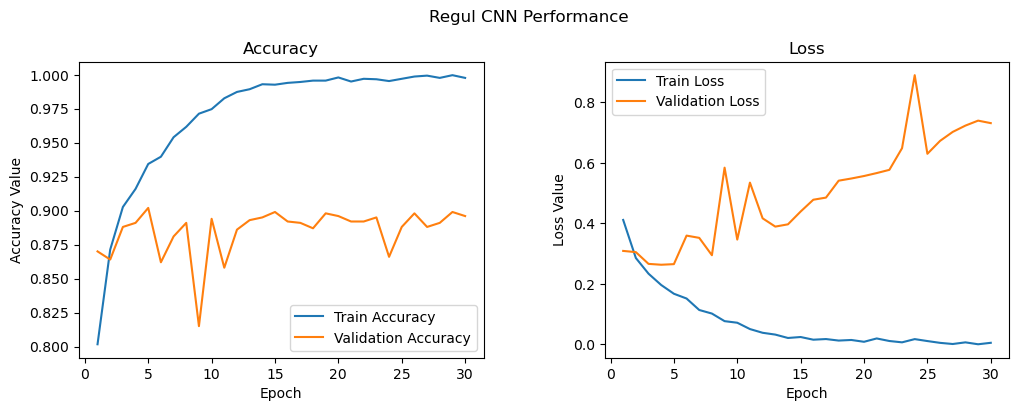

In [68]:
# Display accuracy values

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Regul CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))

ax1.plot(epoch_list, historyTL1.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, historyTL1.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, historyTL1.history['loss'], label='Train Loss')
ax2.plot(epoch_list, historyTL1.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

##### Building Pretrained CNN model with image augmentation as a feature extractor

In [69]:
# Data generators

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,
                                      rotation_range=50,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [70]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc,
                                     batch_size=30)
val_generator = val_datagen.flow(validation_imgs,
                                 validation_labels_enc,
                                 batch_size=20)

In [71]:
modelTL2 = Sequential()

modelTL2.add(vgg_model)
modelTL2.add(Dense(512, activation='relu', input_dim=input_shape))
modelTL2.add(Dropout(0.3))
modelTL2.add(Dense(512, activation='relu'))
modelTL2.add(Dropout(0.3))
modelTL2.add(Dense(1, activation='sigmoid'))

modelTL2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

modelTL2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 8192)              14714688  
                                                                 
 dense_22 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 1)                 513       
                                                                 
Total params: 19,172,673
Trainable params: 4,457,985
N

In [72]:
# Train the model

historyTL2 = modelTL2.fit_generator(train_generator, steps_per_epoch=100,
                                 epochs=100,
                                 validation_data=val_generator,
                                 validation_steps=50,
                                 verbose=1)

Epoch 1/100


/var/folders/r7/09kq76453l39v8hylnmfxtjc0000gn/T/ipykernel_5554/2876760933.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  historyTL2 = modelTL2.fit_generator(train_generator, steps_per_epoch=100,
2022-09-29 17:06:04.949381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.6454 - accuracy: 0.6227

2022-09-29 17:06:12.747921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 10s 93ms/step - loss: 0.6454 - accuracy: 0.6227 - val_loss: 0.4923 - val_accuracy: 0.8070
Epoch 2/100
100/100 [==============================] - 9s 89ms/step - loss: 0.5430 - accuracy: 0.7370 - val_loss: 0.4063 - val_accuracy: 0.8280
Epoch 3/100
100/100 [==============================] - 9s 90ms/step - loss: 0.4819 - accuracy: 0.7767 - val_loss: 0.3524 - val_accuracy: 0.8470
Epoch 4/100
100/100 [==============================] - 9s 89ms/step - loss: 0.4445 - accuracy: 0.8003 - val_loss: 0.3288 - val_accuracy: 0.8440
Epoch 5/100
100/100 [==============================] - 9s 89ms/step - loss: 0.4342 - accuracy: 0.7943 - val_loss: 0.3134 - val_accuracy: 0.8600
Epoch 6/100
100/100 [==============================] - 9s 90ms/step - loss: 0.4193 - accuracy: 0.8043 - val_loss: 0.3025 - val_accuracy: 0.8610
Epoch 7/100
100/100 [==============================] - 9s 89ms/step - loss: 0.3884 - accuracy: 0.8270 - val_loss: 0.3024 - val_accuracy: 0.8690
Epo

In [73]:
modelTL2.save('images/cats_dogs_tl2.h5')

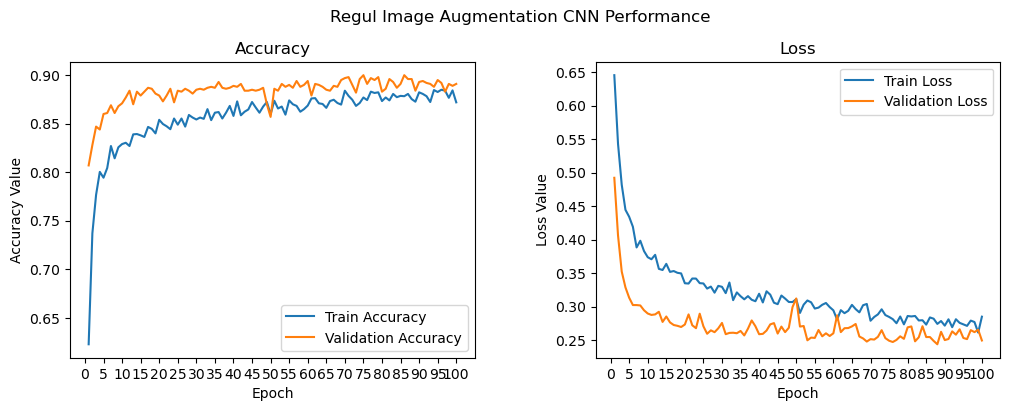

In [74]:
# Display accuracy values

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Regul Image Augmentation CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))

ax1.plot(epoch_list, historyTL2.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, historyTL2.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, historyTL2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, historyTL2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

##### Building Pretrained CNN model with image augmentation and with fine-tuning

In [75]:
vgg_model.trainable = True
set_trainable = False

for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: [<tf.Variable 'block4_conv1/kernel:0' shape=(3, 3, 256, 512) dtype=float32, numpy=
array([[[[-1.24538150e-02,  8.40655994e-03, -5.28845051e-03, ...,
          -2.04581907e-03, -3.92359449e-03,  1.30683812e-03],
         [ 1.15566896e-02,  2.46055960e-03, -4.09082584e-02, ...,
          -4.92062652e-03, -1.63423386e-03,  8.94230697e-03],
         [-1.43469922e-04, -5.65873180e-03,  1.84066985e-02, ...,
          -2.08840682e-03,  2.63321817e-06, -2.50728261e-02],
         ...,
         [ 1.37888230e-02, -6.58180192e-03,  9.65370331e-03, ...,
           7.17610447e-03,  3.45725450e-03,  5.33173978e-03],
         [ 2.65833316e-03,  7.77704641e-04,  2.86239345e-04, ...,
          -5.40583069e-03,  8.93119723e-03,  1.40043022e-02],
         [-8.53933115e-03,  1.43394794e-03, -2.91879033e-03, ...,
           3.77660524e-03,  2.05454584e-02, -1.35868033e-02]],

        [[-1.20176468e-02,  1.51250837e-03,  3.43130133e-03, ...,
          -1.57830697e-02, -2.39501009e-03,  2.93

In [76]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x298a55be0>,input_1,False
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x298a55a00>,block1_conv1,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x298ef9400>,block1_conv2,False
3,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x298a55670>,block1_pool,False
4,<keras.layers.convolutional.conv2d.Conv2D object at 0x298a414f0>,block2_conv1,False
5,<keras.layers.convolutional.conv2d.Conv2D object at 0x298a293a0>,block2_conv2,False
6,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x298a641f0>,block2_pool,False
7,<keras.layers.convolutional.conv2d.Conv2D object at 0x298a33cd0>,block3_conv1,False
8,<keras.layers.convolutional.conv2d.Conv2D object at 0x298a64640>,block3_conv2,False
9,<keras.layers.convolutional.conv2d.Conv2D object at 0x298a49be0>,block3_conv3,False


In [77]:
# Data generators

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,
                                      rotation_range=50,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

In [78]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc,
                                        batch_size=30)

val_generator = val_datagen.flow(validation_imgs,
                                    validation_labels_enc,
                                    batch_size=20)

In [79]:
modelTL3 = Sequential()

modelTL3.add(vgg_model)
modelTL3.add(Dense(512, activation='relu', input_dim=input_shape))
modelTL3.add(Dropout(0.3))
modelTL3.add(Dense(512, activation='relu'))
modelTL3.add(Dropout(0.3))
modelTL3.add(Dense(1, activation='sigmoid'))

modelTL3.compile(loss='binary_crossentropy',
                 optimizer=optimizers.RMSprop(lr=1e-5),
                 metrics=['accuracy'])

modelTL3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 8192)              14714688  
                                                                 
 dense_25 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 513       
                                                                 
Total params: 19,172,673
Trainable params: 17,437,185

/Users/stephanebonnevay/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [80]:
# Train the model

historyTL3 = modelTL3.fit_generator(train_generator, steps_per_epoch=100,
                                 epochs=100,
                                 validation_data=val_generator,
                                 validation_steps=50,
                                 verbose=1)

Epoch 1/100


/var/folders/r7/09kq76453l39v8hylnmfxtjc0000gn/T/ipykernel_5554/2275453684.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  historyTL3 = modelTL3.fit_generator(train_generator, steps_per_epoch=100,
2022-09-29 17:20:54.998802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.5683 - accuracy: 0.6937

2022-09-29 17:21:06.447430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 14s 130ms/step - loss: 0.5683 - accuracy: 0.6937 - val_loss: 0.3701 - val_accuracy: 0.8270
Epoch 2/100
100/100 [==============================] - 13s 126ms/step - loss: 0.3859 - accuracy: 0.8283 - val_loss: 0.3378 - val_accuracy: 0.8630
Epoch 3/100
100/100 [==============================] - 12s 124ms/step - loss: 0.3070 - accuracy: 0.8700 - val_loss: 0.2065 - val_accuracy: 0.9160
Epoch 4/100
100/100 [==============================] - 12s 124ms/step - loss: 0.2686 - accuracy: 0.8913 - val_loss: 0.2069 - val_accuracy: 0.9180
Epoch 5/100
100/100 [==============================] - 13s 126ms/step - loss: 0.2549 - accuracy: 0.8970 - val_loss: 0.1799 - val_accuracy: 0.9300
Epoch 6/100
100/100 [==============================] - 13s 126ms/step - loss: 0.2444 - accuracy: 0.9003 - val_loss: 0.1862 - val_accuracy: 0.9300
Epoch 7/100
100/100 [==============================] - 13s 125ms/step - loss: 0.2091 - accuracy: 0.9137 - val_loss: 0.1622 - val_accurac

Epoch 57/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0353 - accuracy: 0.9857 - val_loss: 0.1962 - val_accuracy: 0.9570
Epoch 58/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0372 - accuracy: 0.9867 - val_loss: 0.1570 - val_accuracy: 0.9640
Epoch 59/100
100/100 [==============================] - 13s 126ms/step - loss: 0.0347 - accuracy: 0.9883 - val_loss: 0.3992 - val_accuracy: 0.9330
Epoch 60/100
100/100 [==============================] - 13s 127ms/step - loss: 0.0324 - accuracy: 0.9883 - val_loss: 0.2621 - val_accuracy: 0.9450
Epoch 61/100
100/100 [==============================] - 13s 126ms/step - loss: 0.0410 - accuracy: 0.9850 - val_loss: 0.1755 - val_accuracy: 0.9600
Epoch 62/100
100/100 [==============================] - 13s 126ms/step - loss: 0.0273 - accuracy: 0.9903 - val_loss: 0.1834 - val_accuracy: 0.9610
Epoch 63/100
100/100 [==============================] - 13s 125ms/step - loss: 0.0271 - accuracy: 0.9903 - val_loss: 0

In [81]:
modelTL3.save('images/cats_dogs_tl3.h5')

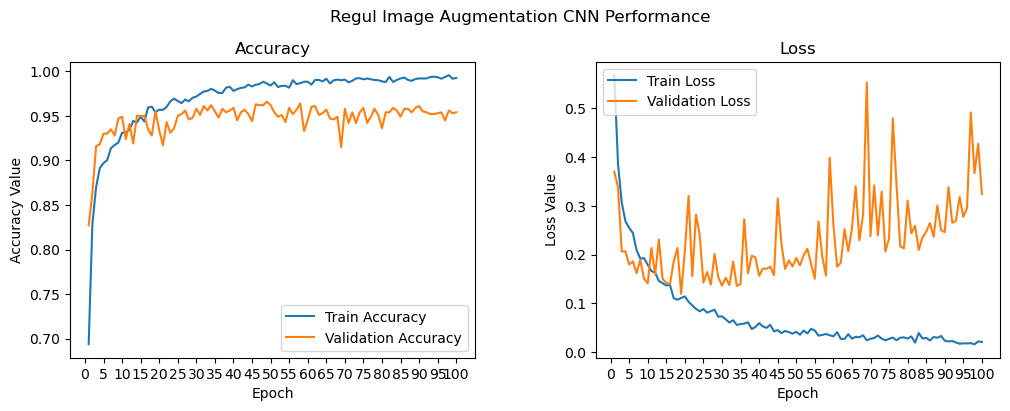

In [82]:
# Display accuracy values

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Regul Image Augmentation CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))

ax1.plot(epoch_list, historyTL3.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, historyTL3.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, historyTL3.history['loss'], label='Train Loss')
ax2.plot(epoch_list, historyTL3.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")